# Final Project

This project focuses on analyzing Airbnb property performance data in the United States over the last 12 months (April 2023 - March 2024).
The dataset includes key metrics such as Average Daily Rates (ADRs), Revenue, Occupancy rates, and property details including # of bedrooms, # of bathrooms, State and Zipcode. The objective is to provide insights for investors seeking to identify the best places to invest in Airbnb properties based on their preferred metrics. By analyzing factors such as location, property amenities, and guest preferences, investors can optimize their investment strategy to maximize revenue and return on investment.

In [1]:
# Import necessary libraries

import pandas as pd

In [2]:
# Load the 1st dataset: annual performances (April 2023 - March 2024)

annual_df = pd.read_csv("/Users/clark/Desktop/ironhack/final-project/files/us_LTM_Property_Extended_Match_2024-04-04(2).csv", delimiter = ",")
annual_df

,Property ID,Property Type,Listing Type,Country,State,City,Zipcode,Neighborhood,Average Daily Rate (USD),Annual Revenue LTM (USD),...,HomeAway Premier Partner,Count Reservation Days LTM,Count Available Days LTM,Count Blocked Days LTM,Listing URL,Latitude,Longitude,Exact Location,Overall Rating,Amenities
0,ab-3890373,Rental unit,Entire home/apt,United States,Massachusetts,Boston,2108.0,Beacon Hill,146.28,4242.0,...,False,29.0,0.0,337.0,https://www.airbnb.com/rooms/3890373,42.357920,-71.064320,False,98.0,"[""kitchen"", ""wireless_internet"", ""tv"", ""dryer""..."
1,ab-3896205,Guest suite,Entire home/apt,United States,California,San Francisco,94118.0,Presidio Heights,198.23,32906.0,...,True,166.0,40.0,160.0,https://www.airbnb.com/rooms/3896205,37.788870,-122.447540,False,96.0,"[""wireless_internet"", ""dryer"", ""washer"", ""lapt..."
2,ab-3897112,Rental unit,Entire home/apt,United States,District of Columbia,Washington,20002.0,Eckington,182.87,28893.0,...,False,158.0,22.0,175.0,https://www.airbnb.com/rooms/3897112,38.911730,-77.008620,False,99.0,"[""free_parking"", ""kitchen"", ""wireless_internet..."
3,ab-3897562,Rental unit,Entire home/apt,United States,Minnesota,Minneapolis,55410.0,Southwest,153.79,5229.0,...,False,34.0,42.0,290.0,https://www.airbnb.com/rooms/3897562,44.922470,-93.317260,True,97.0,"[""kitchen"", ""free_parking"", ""wireless_internet..."
4,ab-3898306,Rental unit,Entire home/apt,United States,District of Columbia,Washington,20001.0,Shaw,128.04,6146.0,...,False,48.0,16.0,223.0,https://www.airbnb.com/rooms/3898306,38.905930,-77.024470,True,94.0,"[""kitchen"", ""wireless_internet"", ""cable"", ""lap..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65776,ab-1112409995214114863,Cabin,Entire home/apt,United States,California,Homewood,96141.0,Tahoma,211.83,2542.0,...,True,12.0,2.0,0.0,https://www.airbnb.com/rooms/1112409995214114863,39.064264,-120.146774,True,100.0,"[""tv"", ""wireless_internet"", ""kitchen"", ""free_p..."
65777,ab-1112998486681067472,Condo,Entire home/apt,United States,South Carolina,Columbia,29201.0,Downtown,112.25,449.0,...,True,4.0,8.0,0.0,https://www.airbnb.com/rooms/1112998486681067472,33.991269,-81.029696,True,100.0,"[""tv"", ""wireless_internet"", ""ac"", ""pool"", ""kit..."
65778,ab-1113181181285270863,Condo,Entire home/apt,United States,Tennessee,Nashville,37207.0,District 2,400.88,3207.0,...,True,8.0,0.0,0.0,https://www.airbnb.com/rooms/1113181181285270863,36.193320,-86.778530,True,100.0,"[""kitchen"", ""jacuzzi"", ""wireless_internet"", ""f..."
65779,ab-1113262088121529978,Rental unit,Entire home/apt,United States,Georgia,Atlanta,30313.0,Centennial Place,199.25,1594.0,...,True,8.0,6.0,0.0,https://www.airbnb.com/rooms/1113262088121529978,33.765070,-84.392140,False,100.0,"[""elevator"", ""kitchen"", ""free_parking"", ""wirel..."


## Data cleaning

In [3]:
# Create a separate dataframe for Amenaties

amenities_df = annual_df[['Property ID', 'Amenities']]

In [4]:
# Create a copy

annual_df1 = annual_df.copy()

In [5]:
# We are going to drop the Amenaties column

annual_df1.drop(columns=["Amenities", "Listing URL"], inplace=True)

In [6]:
# We are going to focus on cleaning the data from the annual_df dataset

annual_df1

,Property ID,Property Type,Listing Type,Country,State,City,Zipcode,Neighborhood,Average Daily Rate (USD),Annual Revenue LTM (USD),...,Max Guests,Airbnb Superhost,HomeAway Premier Partner,Count Reservation Days LTM,Count Available Days LTM,Count Blocked Days LTM,Latitude,Longitude,Exact Location,Overall Rating
0,ab-3890373,Rental unit,Entire home/apt,United States,Massachusetts,Boston,2108.0,Beacon Hill,146.28,4242.0,...,2,False,False,29.0,0.0,337.0,42.357920,-71.064320,False,98.0
1,ab-3896205,Guest suite,Entire home/apt,United States,California,San Francisco,94118.0,Presidio Heights,198.23,32906.0,...,2,True,True,166.0,40.0,160.0,37.788870,-122.447540,False,96.0
2,ab-3897112,Rental unit,Entire home/apt,United States,District of Columbia,Washington,20002.0,Eckington,182.87,28893.0,...,4,True,False,158.0,22.0,175.0,38.911730,-77.008620,False,99.0
3,ab-3897562,Rental unit,Entire home/apt,United States,Minnesota,Minneapolis,55410.0,Southwest,153.79,5229.0,...,5,False,False,34.0,42.0,290.0,44.922470,-93.317260,True,97.0
4,ab-3898306,Rental unit,Entire home/apt,United States,District of Columbia,Washington,20001.0,Shaw,128.04,6146.0,...,5,True,False,48.0,16.0,223.0,38.905930,-77.024470,True,94.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65776,ab-1112409995214114863,Cabin,Entire home/apt,United States,California,Homewood,96141.0,Tahoma,211.83,2542.0,...,8,False,True,12.0,2.0,0.0,39.064264,-120.146774,True,100.0
65777,ab-1112998486681067472,Condo,Entire home/apt,United States,South Carolina,Columbia,29201.0,Downtown,112.25,449.0,...,4,False,True,4.0,8.0,0.0,33.991269,-81.029696,True,100.0
65778,ab-1113181181285270863,Condo,Entire home/apt,United States,Tennessee,Nashville,37207.0,District 2,400.88,3207.0,...,12,True,True,8.0,0.0,0.0,36.193320,-86.778530,True,100.0
65779,ab-1113262088121529978,Rental unit,Entire home/apt,United States,Georgia,Atlanta,30313.0,Centennial Place,199.25,1594.0,...,2,True,True,8.0,6.0,0.0,33.765070,-84.392140,False,100.0


In [7]:
# Check Nans

annual_df1.isnull().sum()

Property ID                   0
Property Type                 0
Listing Type                  0
Country                       0
State                         0
City                          0
Zipcode                       0
Neighborhood                  0
Average Daily Rate (USD)      0
Annual Revenue LTM (USD)      0
Occupancy Rate LTM            0
Number of Bookings LTM        0
Bedrooms                      0
Bathrooms                     0
Max Guests                    0
Airbnb Superhost              0
HomeAway Premier Partner      0
Count Reservation Days LTM    0
Count Available Days LTM      0
Count Blocked Days LTM        0
Latitude                      0
Longitude                     0
Exact Location                0
Overall Rating                0
dtype: int64

In [8]:
annual_df1.shape

(65781, 24)

In [9]:
# Check dtypes of our columns

annual_df1.dtypes

Property ID                    object
Property Type                  object
Listing Type                   object
Country                        object
State                          object
City                           object
Zipcode                       float64
Neighborhood                   object
Average Daily Rate (USD)      float64
Annual Revenue LTM (USD)      float64
Occupancy Rate LTM            float64
Number of Bookings LTM        float64
Bedrooms                        int64
Bathrooms                     float64
Max Guests                      int64
Airbnb Superhost                 bool
HomeAway Premier Partner         bool
Count Reservation Days LTM    float64
Count Available Days LTM      float64
Count Blocked Days LTM        float64
Latitude                      float64
Longitude                     float64
Exact Location                   bool
Overall Rating                float64
dtype: object

In [10]:
# Checking the values of the Zipcode column

annual_df1["Zipcode"]

0         2108.0
1        94118.0
2        20002.0
3        55410.0
4        20001.0
          ...   
65776    96141.0
65777    29201.0
65778    37207.0
65779    30313.0
65780    27949.0
Name: Zipcode, Length: 65781, dtype: float64

In [11]:
# We are going to change the type of the Zipcode from a float to a object

annual_df1["Zipcode"] = annual_df1["Zipcode"].astype(int)

annual_df1["Zipcode"] = annual_df1["Zipcode"].astype(str).str.rstrip(".0")

In [12]:
# Checking the values of the Overall Rating column

annual_df1["Overall Rating"]

0         98.0
1         96.0
2         99.0
3         97.0
4         94.0
         ...  
65776    100.0
65777    100.0
65778    100.0
65779    100.0
65780    100.0
Name: Overall Rating, Length: 65781, dtype: float64

In [13]:
# We are going to change the type of the Overall Rating

annual_df1['Overall Rating'] = annual_df1['Overall Rating'].astype(int)

In [14]:
annual_df1

,Property ID,Property Type,Listing Type,Country,State,City,Zipcode,Neighborhood,Average Daily Rate (USD),Annual Revenue LTM (USD),...,Max Guests,Airbnb Superhost,HomeAway Premier Partner,Count Reservation Days LTM,Count Available Days LTM,Count Blocked Days LTM,Latitude,Longitude,Exact Location,Overall Rating
0,ab-3890373,Rental unit,Entire home/apt,United States,Massachusetts,Boston,2108,Beacon Hill,146.28,4242.0,...,2,False,False,29.0,0.0,337.0,42.357920,-71.064320,False,98
1,ab-3896205,Guest suite,Entire home/apt,United States,California,San Francisco,94118,Presidio Heights,198.23,32906.0,...,2,True,True,166.0,40.0,160.0,37.788870,-122.447540,False,96
2,ab-3897112,Rental unit,Entire home/apt,United States,District of Columbia,Washington,20002,Eckington,182.87,28893.0,...,4,True,False,158.0,22.0,175.0,38.911730,-77.008620,False,99
3,ab-3897562,Rental unit,Entire home/apt,United States,Minnesota,Minneapolis,5541,Southwest,153.79,5229.0,...,5,False,False,34.0,42.0,290.0,44.922470,-93.317260,True,97
4,ab-3898306,Rental unit,Entire home/apt,United States,District of Columbia,Washington,20001,Shaw,128.04,6146.0,...,5,True,False,48.0,16.0,223.0,38.905930,-77.024470,True,94
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65776,ab-1112409995214114863,Cabin,Entire home/apt,United States,California,Homewood,96141,Tahoma,211.83,2542.0,...,8,False,True,12.0,2.0,0.0,39.064264,-120.146774,True,100
65777,ab-1112998486681067472,Condo,Entire home/apt,United States,South Carolina,Columbia,29201,Downtown,112.25,449.0,...,4,False,True,4.0,8.0,0.0,33.991269,-81.029696,True,100
65778,ab-1113181181285270863,Condo,Entire home/apt,United States,Tennessee,Nashville,37207,District 2,400.88,3207.0,...,12,True,True,8.0,0.0,0.0,36.193320,-86.778530,True,100
65779,ab-1113262088121529978,Rental unit,Entire home/apt,United States,Georgia,Atlanta,30313,Centennial Place,199.25,1594.0,...,2,True,True,8.0,6.0,0.0,33.765070,-84.392140,False,100


## EDA

In [15]:
# Import necessary libraries

import os
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.preprocessing import LabelEncoder

import warnings
warnings.filterwarnings('ignore')

In [16]:
# Create a copy

annual_df2 = annual_df1.copy()

In [17]:
annual_df2.shape

(65781, 24)

In [18]:
annual_df2.describe()

,Average Daily Rate (USD),Annual Revenue LTM (USD),Occupancy Rate LTM,Number of Bookings LTM,Bedrooms,Bathrooms,Max Guests,Count Reservation Days LTM,Count Available Days LTM,Count Blocked Days LTM,Latitude,Longitude,Overall Rating
count,65781.000000,6.578100e+04,65781.000000,65781.000000,65781.000000,65781.000000,65781.000000,65781.000000,65781.000000,65781.000000,65781.000000,65781.000000,65781.000000
mean,371.775340,5.449809e+04,0.641156,41.536173,2.297867,1.947166,6.093446,145.417932,77.654475,95.246743,32.466583,-107.500725,94.853651
std,327.816537,6.236601e+04,0.222947,29.479143,1.397929,1.115121,3.238246,90.674855,57.623622,99.447102,7.861616,28.076313,7.890496
min,27.460000,8.100000e+01,0.020000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,17.680930,-159.714620,20.000000
25%,190.500000,1.683700e+04,0.485000,18.000000,1.000000,1.000000,4.000000,68.000000,29.000000,9.000000,25.805250,-121.442000,93.000000
50%,282.000000,3.877200e+04,0.656000,38.000000,2.000000,2.000000,6.000000,142.000000,68.000000,62.000000,32.802490,-97.715200,97.000000
75%,434.870000,6.992700e+04,0.816000,60.000000,3.000000,2.500000,8.000000,216.000000,117.000000,153.000000,38.636330,-84.427950,99.000000
max,7080.000000,1.446934e+06,1.000000,236.000000,24.000000,17.500000,16.000000,366.000000,314.000000,365.000000,48.963900,-64.586750,100.000000


In [19]:
# Separate the numerical from the categorical columns

numerical_columns = annual_df2.select_dtypes("number")
categorical_columns = annual_df2.select_dtypes("object")

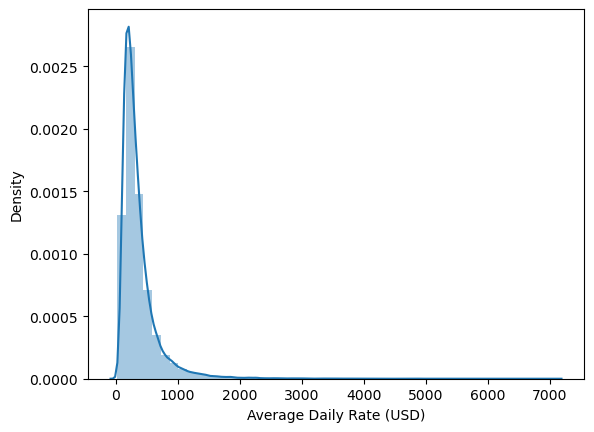

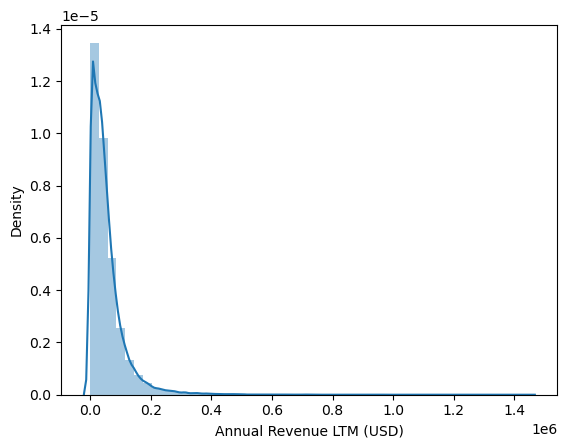

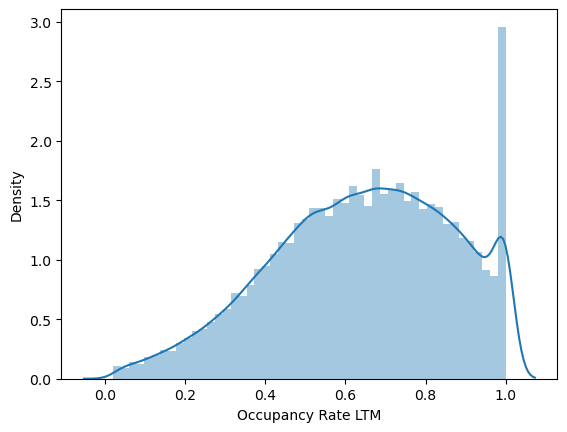

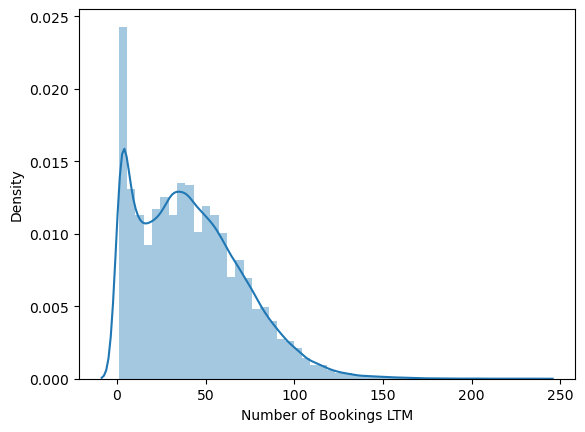

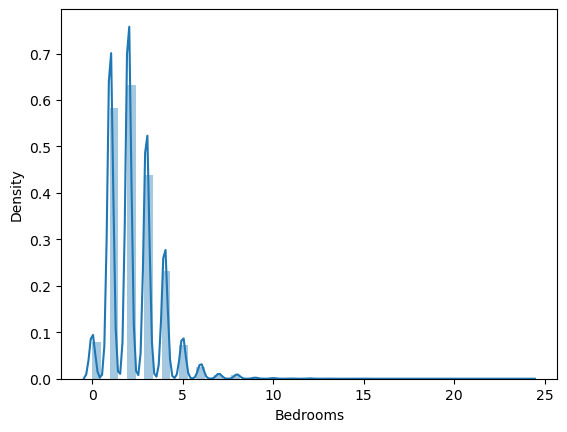

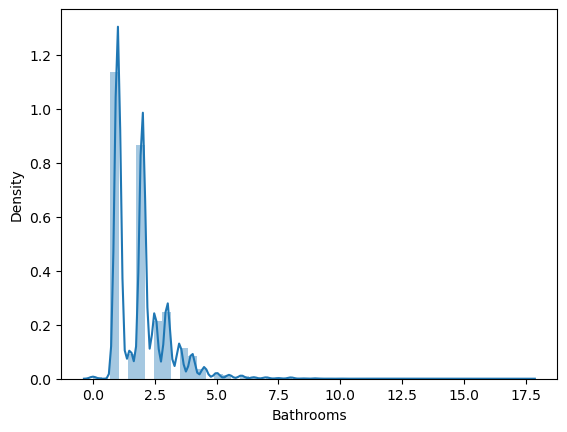

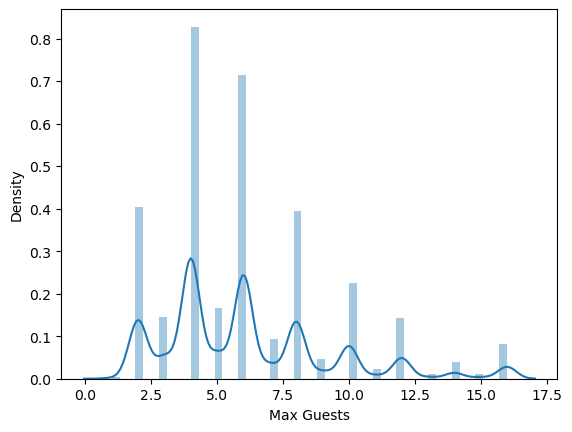

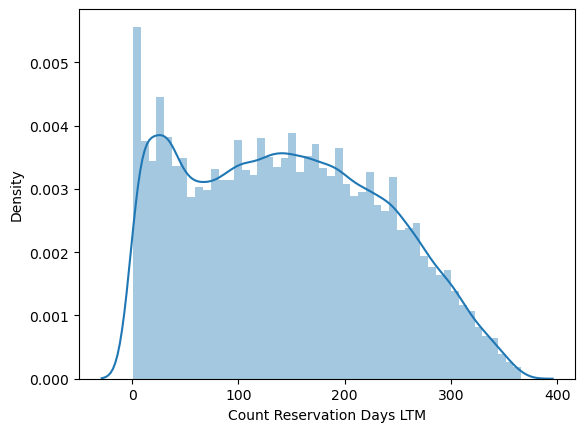

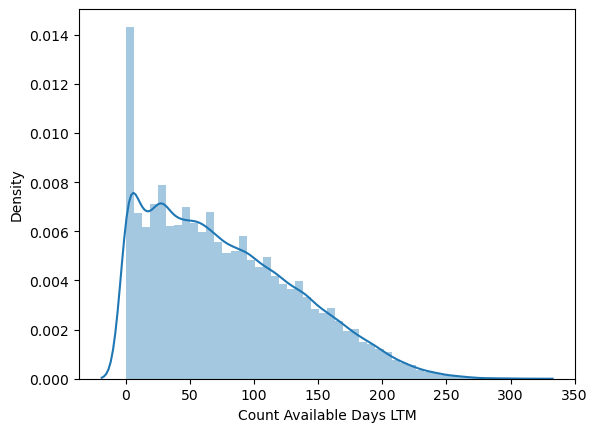

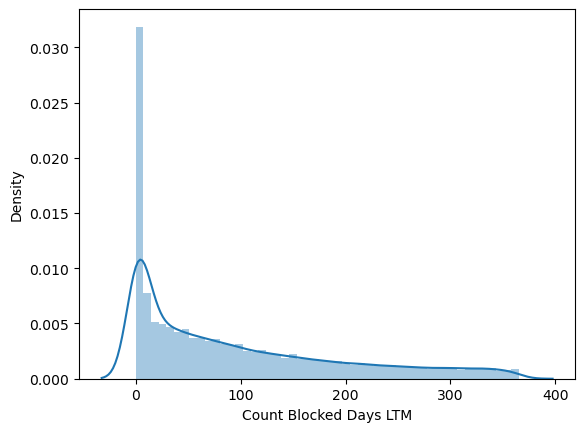

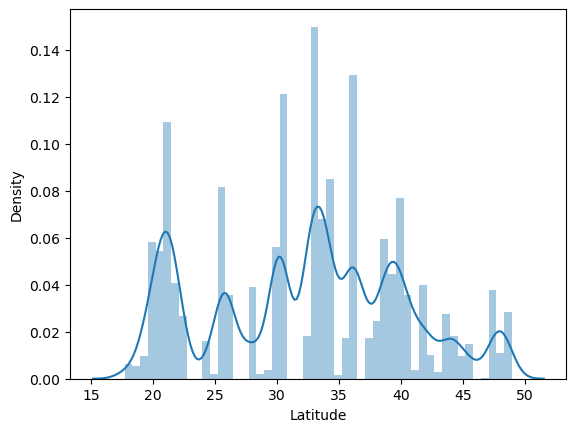

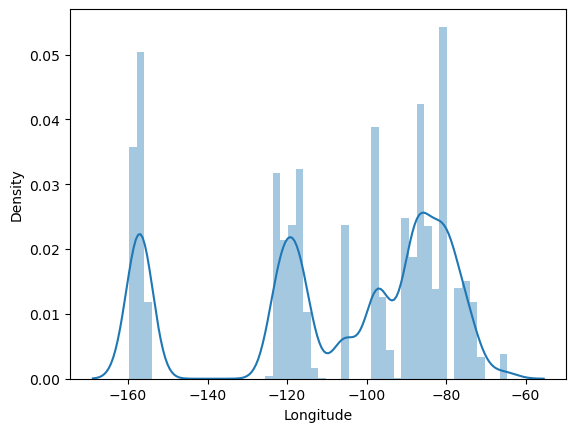

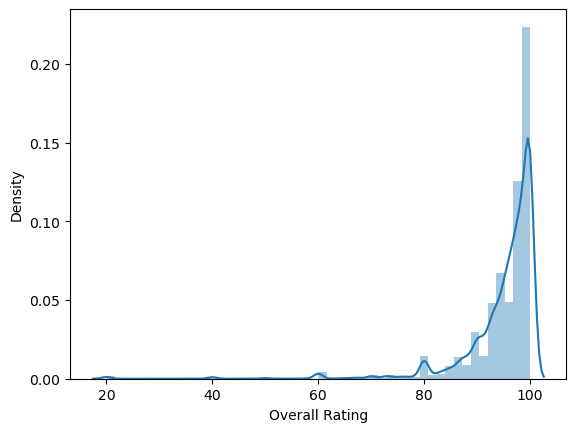

In [20]:
# Probability distributions

for col in numerical_columns.columns:
  sns.distplot(numerical_columns[col])
  plt.show()

<Axes: >

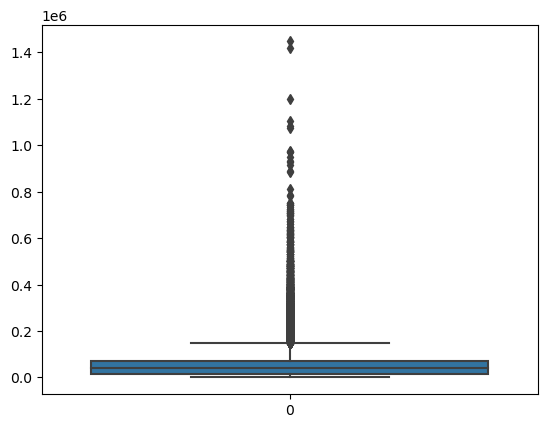

In [21]:
# Identifying outliers

sns.boxplot(annual_df2["Annual Revenue LTM (USD)"])

In [22]:
# Correlation between the features and the target

correlations_matrix = numerical_columns.corr()

correlations_matrix["Annual Revenue LTM (USD)"].sort_values(ascending=False)

Annual Revenue LTM (USD)      1.000000
Average Daily Rate (USD)      0.702673
Count Reservation Days LTM    0.535151
Bathrooms                     0.515587
Bedrooms                      0.461343
Number of Bookings LTM        0.455114
Max Guests                    0.448634
Occupancy Rate LTM            0.253109
Overall Rating                0.107894
Count Available Days LTM      0.082024
Longitude                    -0.162327
Latitude                     -0.189723
Count Blocked Days LTM       -0.308608
Name: Annual Revenue LTM (USD), dtype: float64

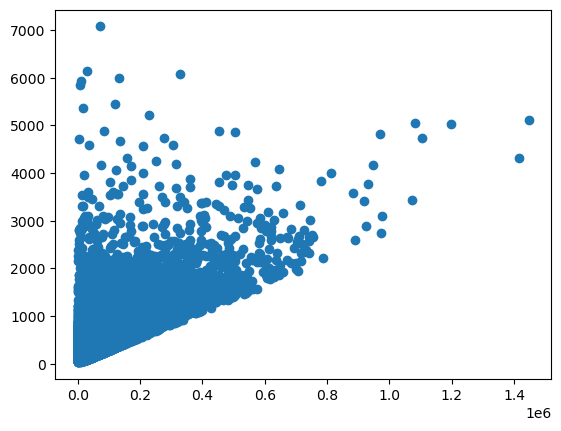

In [23]:
# ADR (USD) has the highest correlation

plt.scatter(annual_df2["Annual Revenue LTM (USD)"], annual_df2["Average Daily Rate (USD)"])

<Axes: xlabel='State', ylabel='Annual Revenue LTM (USD)'>

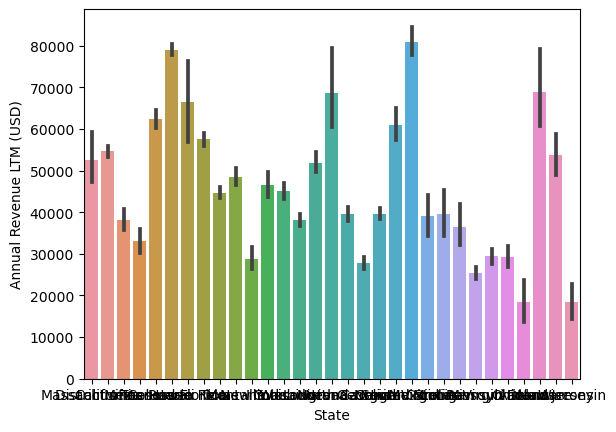

In [24]:
# For now, when analysing categorical we can use barplots

sns.barplot(x=annual_df2["State"], y=annual_df2["Annual Revenue LTM (USD)"])

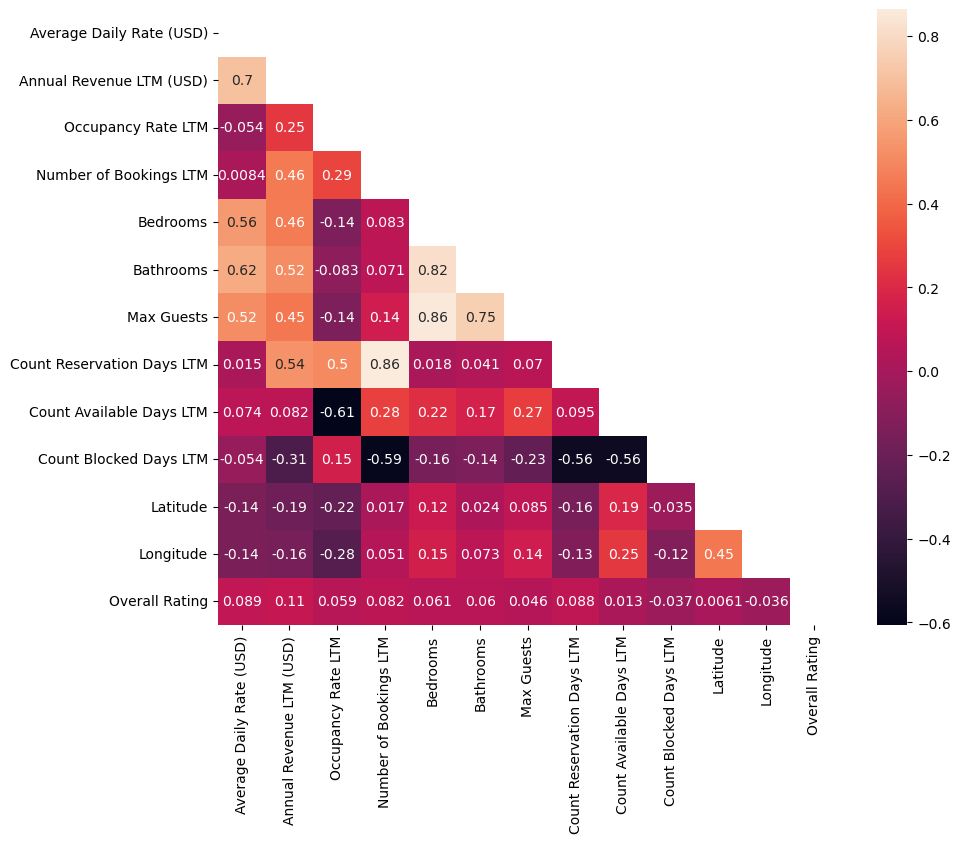

In [25]:
# Let's check the correlation amongst features - multicolinearity

mask = np.zeros_like(correlations_matrix)
mask[np.triu_indices_from(mask)] = True

fig, ax = plt.subplots(figsize=(10, 8))
ax = sns.heatmap(correlations_matrix, mask=mask, annot=True)
plt.show()

In [32]:
# Create a copy

annual_final = annual_df2.copy()
annual_final

,Property ID,Property Type,Listing Type,Country,State,City,Zipcode,Neighborhood,Average Daily Rate (USD),Annual Revenue LTM (USD),...,Max Guests,Airbnb Superhost,HomeAway Premier Partner,Count Reservation Days LTM,Count Available Days LTM,Count Blocked Days LTM,Latitude,Longitude,Exact Location,Overall Rating
0,ab-3890373,Rental unit,Entire home/apt,United States,Massachusetts,Boston,2108,Beacon Hill,146.28,4242.0,...,2,False,False,29.0,0.0,337.0,42.357920,-71.064320,False,98
1,ab-3896205,Guest suite,Entire home/apt,United States,California,San Francisco,94118,Presidio Heights,198.23,32906.0,...,2,True,True,166.0,40.0,160.0,37.788870,-122.447540,False,96
2,ab-3897112,Rental unit,Entire home/apt,United States,District of Columbia,Washington,20002,Eckington,182.87,28893.0,...,4,True,False,158.0,22.0,175.0,38.911730,-77.008620,False,99
3,ab-3897562,Rental unit,Entire home/apt,United States,Minnesota,Minneapolis,5541,Southwest,153.79,5229.0,...,5,False,False,34.0,42.0,290.0,44.922470,-93.317260,True,97
4,ab-3898306,Rental unit,Entire home/apt,United States,District of Columbia,Washington,20001,Shaw,128.04,6146.0,...,5,True,False,48.0,16.0,223.0,38.905930,-77.024470,True,94
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65776,ab-1112409995214114863,Cabin,Entire home/apt,United States,California,Homewood,96141,Tahoma,211.83,2542.0,...,8,False,True,12.0,2.0,0.0,39.064264,-120.146774,True,100
65777,ab-1112998486681067472,Condo,Entire home/apt,United States,South Carolina,Columbia,29201,Downtown,112.25,449.0,...,4,False,True,4.0,8.0,0.0,33.991269,-81.029696,True,100
65778,ab-1113181181285270863,Condo,Entire home/apt,United States,Tennessee,Nashville,37207,District 2,400.88,3207.0,...,12,True,True,8.0,0.0,0.0,36.193320,-86.778530,True,100
65779,ab-1113262088121529978,Rental unit,Entire home/apt,United States,Georgia,Atlanta,30313,Centennial Place,199.25,1594.0,...,2,True,True,8.0,6.0,0.0,33.765070,-84.392140,False,100


In [33]:
# Encoding Categorical Variables

annual_final = pd.get_dummies(annual_final, drop_first=True)
annual_final

,Average Daily Rate (USD),Annual Revenue LTM (USD),Occupancy Rate LTM,Number of Bookings LTM,Bedrooms,Bathrooms,Max Guests,Airbnb Superhost,HomeAway Premier Partner,Count Reservation Days LTM,...,Neighborhood_Woodside,Neighborhood_Woodstock,Neighborhood_Wooten,Neighborhood_Wynnefield,Neighborhood_Wynnefield Heights,Neighborhood_Wynwood,Neighborhood_Yesler Terrace,Neighborhood_Yosemite Lakes,Neighborhood_Zephyr Cove-Round Hill Village,Neighborhood_Zilker
0,146.28,4242.0,1.000,1.0,1,1.0,2,False,False,29.0,...,False,False,False,False,False,False,False,False,False,False
1,198.23,32906.0,0.806,25.0,1,1.0,2,True,True,166.0,...,False,False,False,False,False,False,False,False,False,False
2,182.87,28893.0,0.878,23.0,1,1.0,4,True,False,158.0,...,False,False,False,False,False,False,False,False,False,False
3,153.79,5229.0,0.447,10.0,3,1.0,5,False,False,34.0,...,False,False,False,False,False,False,False,False,False,False
4,128.04,6146.0,0.750,6.0,1,1.0,5,True,False,48.0,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65776,211.83,2542.0,0.857,4.0,3,2.0,8,False,True,12.0,...,False,False,False,False,False,False,False,False,False,False
65777,112.25,449.0,0.333,1.0,1,1.0,4,False,True,4.0,...,False,False,False,False,False,False,False,False,False,False
65778,400.88,3207.0,1.000,2.0,4,4.0,12,True,True,8.0,...,False,False,False,False,False,False,False,False,False,False
65779,199.25,1594.0,0.571,4.0,1,1.0,2,True,True,8.0,...,False,False,False,False,False,False,False,False,False,False


In [34]:
# X-y split

X = annual_final.drop(["Annual Revenue LTM (USD)"], axis=1)
y = annual_final["Annual Revenue LTM (USD)"]

# Train-test split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

X_train

,Average Daily Rate (USD),Occupancy Rate LTM,Number of Bookings LTM,Bedrooms,Bathrooms,Max Guests,Airbnb Superhost,HomeAway Premier Partner,Count Reservation Days LTM,Count Available Days LTM,...,Neighborhood_Woodside,Neighborhood_Woodstock,Neighborhood_Wooten,Neighborhood_Wynnefield,Neighborhood_Wynnefield Heights,Neighborhood_Wynwood,Neighborhood_Yesler Terrace,Neighborhood_Yosemite Lakes,Neighborhood_Zephyr Cove-Round Hill Village,Neighborhood_Zilker
36351,844.78,0.977,21.0,3,3.0,8,False,True,128.0,3.0,...,False,False,False,False,False,False,False,False,False,False
49923,414.44,0.231,13.0,3,2.0,11,False,False,52.0,173.0,...,False,False,False,False,False,False,False,False,False,False
171,311.41,0.872,68.0,2,1.0,5,False,True,260.0,38.0,...,False,False,False,False,False,False,False,False,False,False
12616,541.37,0.763,58.0,2,2.0,6,False,True,229.0,71.0,...,False,False,False,False,False,False,False,False,False,False
1768,162.00,0.636,2.0,1,1.0,3,False,False,7.0,4.0,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37194,310.18,0.900,17.0,2,2.0,6,True,False,72.0,8.0,...,False,False,False,False,False,False,False,False,False,False
6265,476.22,1.000,55.0,2,2.0,8,False,False,230.0,0.0,...,False,False,False,False,False,False,False,False,False,False
54886,450.85,0.495,25.0,4,2.0,8,False,True,96.0,98.0,...,False,False,False,False,False,False,False,False,False,False
860,686.56,0.591,12.0,4,3.0,8,False,True,39.0,27.0,...,False,False,False,False,False,False,False,False,False,False


In [ ]:
# Start the scaler object:
scaler = StandardScaler()

# Fit the scaler object only on the training data to avoid data leakage:
scaler.fit(X_train)

# Transform training and the testing data:
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)